In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
#import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors





/home/brett/.local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


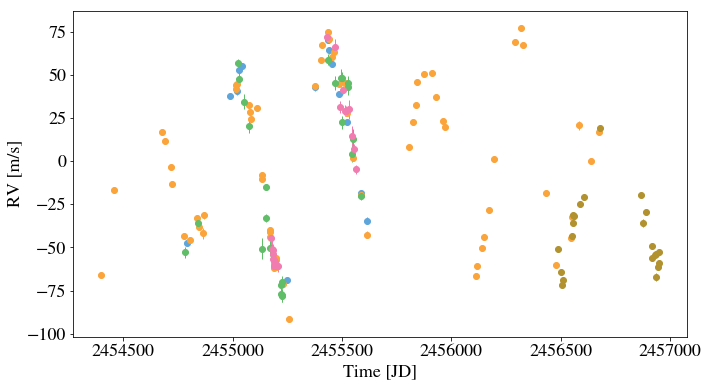

In [2]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()
HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
#HD1502.path_to_data = "/home/brett/musical-octo-goggles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

# t_0 = time.time()
# guess = [24.93338,2.03738,16.41142,-10.98964,38.91007]
# result = op.minimize(opt_offsets,guess)
# HD1502.offsets = result.x
# print "That took  %.3f seconds" %(time.time()-t_0)

# offsets = np.loadtxt('offsets_better')
offsets = [27.9308,3.1068,19.8646,-7.2437,43.2642]
HD1502.offsets = offsets
HD1502.sort_data()
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
#HD1502.path_to_data = "/home/brett/musical-octo-goggles/"

HD1502.plot_RV(epoch=epoch,pnts_per_period=1000)

In [3]:
def three_1502(chromosome):
    per0,per1,per2,mass0,mass1,mass2,M0,M1,M2,e0,e1,e2,pom0,pom1,pom2,i0,i1,i2=chromosome
    HD1502.clear_planets()
    HD1502.add_planet(per = per0, mass = mass0 , M = M0, e=np.exp(e0), pomega = pom0,i=i0)
    HD1502.add_planet(per = per1, mass = mass1, M = M1, e=np.exp(e1), pomega = pom1,i=i1)
    HD1502.add_planet(per = per2, mass = mass2, M = M2, e=np.exp(e2), pomega = pom2,i=i2)
    x=-HD1502.stab_logprob(epoch=epoch,pnts_per_period=80,time=1e6)
    return x

In [ ]:
length=18
bounds=[[415,450],[260,300],[760,800],[2.8,3.05],[0.4,0.6],[0.4,0.62],[45,75],[205,236],[107,138],[np.log(0.05),np.log(0.25)],[np.log(0.05),np.log(0.25)],[np.log(0.05),np.log(0.25)],[125,155],[305,335],[60,90],[85,95],[85,95],[85,95]]
result=HD1502.genetic_search(bounds,length,three_1502,num_gen=250,crossover=1,mutation=0.15,pop_size=75,freq_stat=2,cores=1,database=1,file_name='1502.2',elitism=1)


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 2 (0.80%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 4 (1.60%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 6 (2.40%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 8 (3.20%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 10 (4.00%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 12 (4.80%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 14 (5.60%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 16 (6.40%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 18 (7.20%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 20 (8.00%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 22 (8.80%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 24 (9.60%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 26 (10.40%): Max/Min/Avg Fitness(Raw) [inf(inf)/inf(inf)/inf(inf)]
Gen. 28 (1

In [ ]:
result